In [23]:
import matplotlib.pyplot as plt
import numpy as np
import os
import gzip

In [2]:
root_dir = '/Users/sebastian.khan/personal/data/bam-q1-old/R6_PN_80/DataReduce'

In [3]:
file_h22 = 'D12._q1._0._0._hmod.r5.l3.l2.m2.gz'

In [4]:
file_h32 = 'D12._q1._0._0._hmod.r5.l3.l3.m2.gz'

In [33]:
h22=[]
with gzip.open(os.path.join(root_dir, file_h22), mode="rt") as f:
    lines = f.readlines()
    for line in lines:
        h22.append(list(map(float, line.split('\t'))))
h22 = np.array(h22)

In [35]:
h32=[]
with gzip.open(os.path.join(root_dir, file_h32), mode="rt") as f:
    lines = f.readlines()
    for line in lines:
        h32.append(list(map(float, line.split('\t'))))
h32 = np.array(h32)

In [36]:
h22

array([[ 0.00000000e+00, -1.42417998e-08, -1.39320480e-08],
       [ 3.00000000e-01, -1.81549376e-08, -2.33647633e-08],
       [ 6.00000000e-01, -1.93977208e-08, -3.04358213e-08],
       ...,
       [ 2.08980000e+03,  1.63603858e-09, -1.46342848e-11],
       [ 2.09010000e+03, -1.89378853e-09, -9.85697799e-10],
       [ 2.09040000e+03, -8.03704197e-09, -5.62832080e-09]])

In [37]:
h32

array([[ 0.00000000e+00,  8.87455227e-11, -2.78038574e-10],
       [ 3.00000000e-01,  1.37882578e-10, -3.83357617e-10],
       [ 6.00000000e-01,  1.59524401e-10, -4.34247780e-10],
       ...,
       [ 2.08980000e+03, -9.37809736e-12,  4.08058633e-11],
       [ 2.09010000e+03, -3.22416425e-12, -2.14145083e-11],
       [ 2.09040000e+03,  3.28677286e-11, -1.41644479e-10]])

In [45]:
h22_complex = h22[:,1] - 1.j*h22[:,2]
h32_complex = h32[:,1] - 1.j*h32[:,2]



times = h22[:,0]
max_idx = np.argmax(np.abs(h22_complex))
times = times - times[max_idx]

np.testing.assert_array_almost_equal(h22[:,0], h32[:,0])

In [46]:
plt.plot(times, h22_complex.real)
plt.plot(times, h32_complex.real)

In [49]:
plt.plot(times, np.abs(h22_complex))
plt.plot(times, np.abs(h32_complex))
plt.xlim(-100, 100)

(-100.0, 100.0)

In [50]:
plt.plot(times, np.abs(h32_complex))
plt.xlim(-100, 100)

(-100.0, 100.0)

In [51]:
phase_22 = np.unwrap(np.angle(h22_complex))
phase_32 = np.unwrap(np.angle(h32_complex))

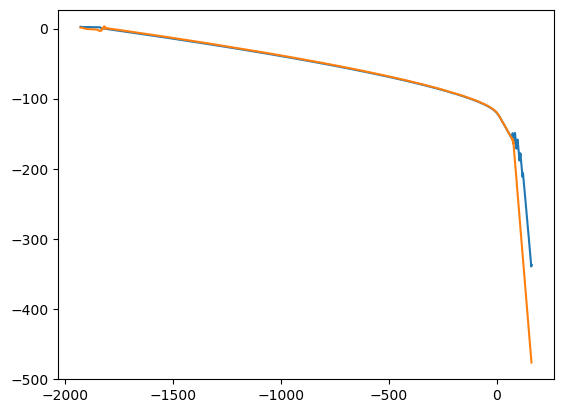

In [53]:
plt.plot(times, phase_22)
plt.plot(times, phase_32)

Text(0.5, 1.0, 'BAM q1 NS $\\phi_{32} - \\phi_{22}$')

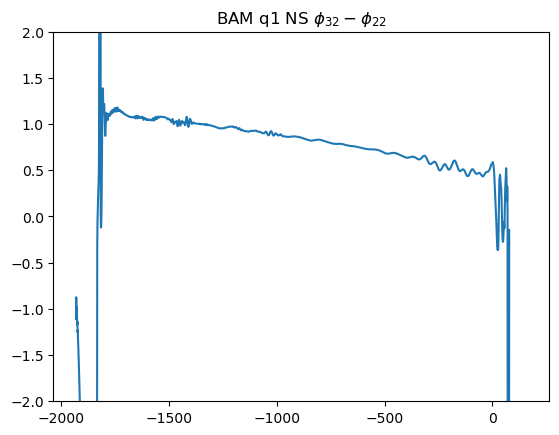

In [59]:
plt.plot(times, phase_32-phase_22)
plt.ylim(-2,2)
plt.title(r"BAM q1 NS $\phi_{32} - \phi_{22}$")

# output data to compare with other codes

In [63]:
# output_dir = "/Users/sebastian.khan/personal/data/NR_COMPARISON_Q1_NS_32_22_MODE"
# base_name = "BAM"
# output_data = np.c_[times, phase_22, phase_32]
# output_file = f"{base_name}_R6-PN-80.npy"
# np.save(os.path.join(output_dir, output_file), output_data)